In [2]:
#upload data file to the colab directory
from google.colab.files import upload
file = upload() 

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import seaborn as sns 
from keras.layers import Dense, Dropout 
from keras.models import Sequential

from keras import callbacks
from sklearn.metrics import confusion_matrix 

In [7]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


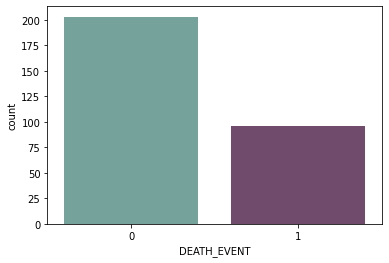

In [9]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"] 
sns.countplot(x= data["DEATH_EVENT"], palette= cols) 

In [10]:
#assigning values to features as X and target as y 
X= data.drop(["DEATH_EVENT"], axis=1) 
y=data["DEATH_EVENT"]  
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [15]:
#Set up a standard scaler for the features 
col_names = list(X.columns) 
s_scaler = preprocessing.StandardScaler () 
X_df=s_scaler.fit_transform(X) 
# X_df
X_df = pd.DataFrame (X_df, columns=col_names) 
X_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [19]:
#spliting test and training sets
X_train,X_test,y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [20]:
early_stopping = callbacks.EarlyStopping(
  min_delta=0.001,
  patience=30, 
  restore_best_weights=True 
  )
# Initialising the model type
model = Sequential()

# layers
#input layer
model.add(Dense (units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#hidden layer1
model.add(Dense (units = 8, kernel_initializer = 'uniform', activation = 'relu')) 
model.add(Dropout (0.25)) 
#hidden layer2
model.add(Dense (units = 4, kernel_initializer = 'uniform', activation = 'relu')) #has 4 nodes 
model.add(Dropout (0.5)) 
#output layer
model.add(Dense (units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 55ms/step - loss: 0.6928 - accuracy: 0.6369 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6919 - accuracy: 0.6480 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.6480 - val_loss: 0.6901 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.6480 - val_loss: 0.6890 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.6480 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6881 - accuracy: 0.6480 - val_loss: 0.6868 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.6480 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 8/500
6/6 [=======

In [24]:
val_accuracy = np.mean (history.history['val_accuracy'])
print("\n %s:%.2f%%" % ('val_accuracy', val_accuracy*100)) 


 val_accuracy:77.07%


In [25]:
# Predicting the test set results
y_pred = model.predict(X_test) 
y_pred = (y_pred > 0.5)  
y_pred

3/3 [==============================] - 0s 5ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [26]:
y_test

268    0
240    0
278    0
176    0
202    0
      ..
24     1
62     0
249    0
90     0
50     1
Name: DEATH_EVENT, Length: 75, dtype: int64

[[51  6]
 [ 7 11]]


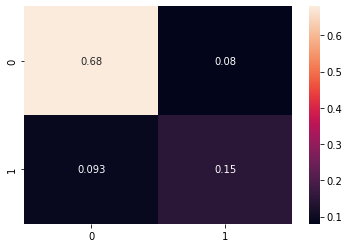

In [27]:
cf_matrix = confusion_matrix(y_test, y_pred) #compare y_test data and y_predict data and make a matrix 
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True) 